In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from pandas.io.json import json_normalize
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from bayes_opt import BayesianOptimization
import requests
import json
import time
from tqdm import tqdm

ModuleNotFoundError: No module named 'lightgbm'

In [1]:
def train_test(df):
  x_train = df.drop(['blueWins'], axis=1)
  y_train = df['blueWins']
  return x_train, y_train

In [4]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

Accuracy:  67.54098360655738
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | 0.6642    | 0.5336    | 0.2189    | 3.0       | 0.907     | 31.74     | 0.5462    |
| 2         | 0.6519    | 0.349     | 0.1102    | 4.587     | 1.616     | 53.54     | 0.8426    |
| 3         | 0.6444    | 0.5766    | 0.2312    | 3.24      | 0.7692    | 30.46     | 0.5569    |
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
| 4         | 0.6594    | 0.6782    | 0.1023    | 5.652     | 1.345     | 33.78     | 0.6515    |
| 5         | 0.6494    | 0.6741    | 0.1629    | 3.265     | 0.967     | 31.82     | 0.5615    |
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
| 6         | 0.6519    |

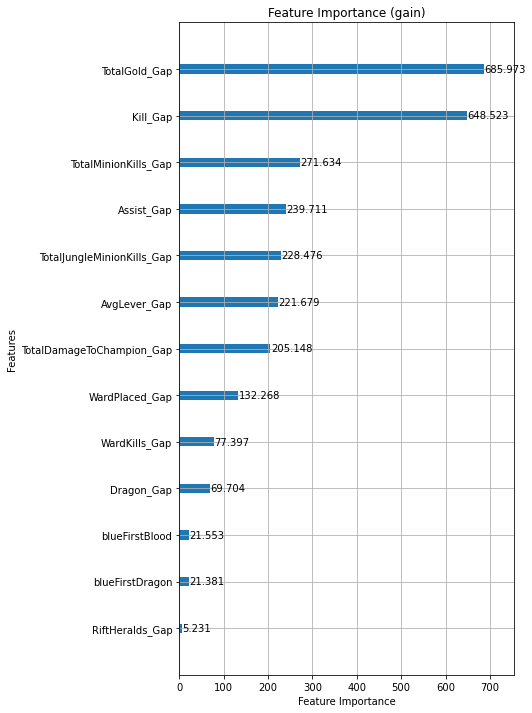

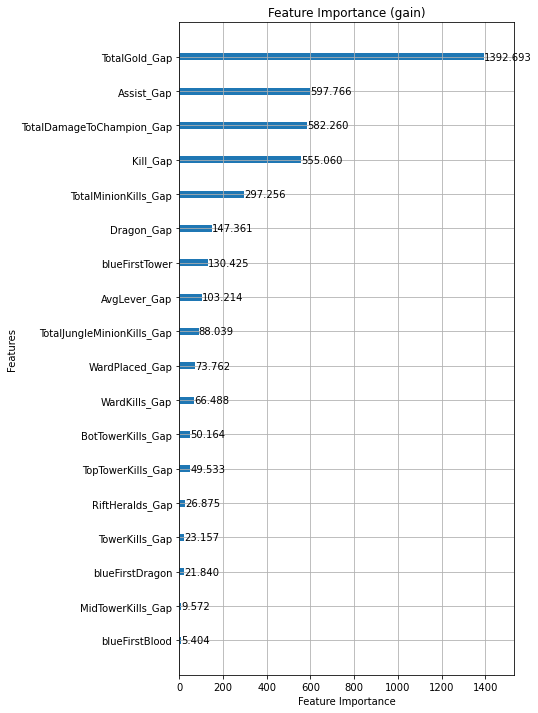

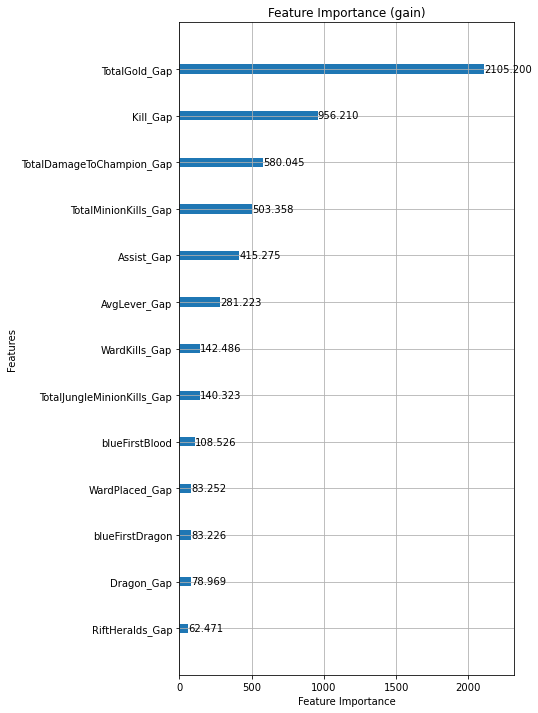

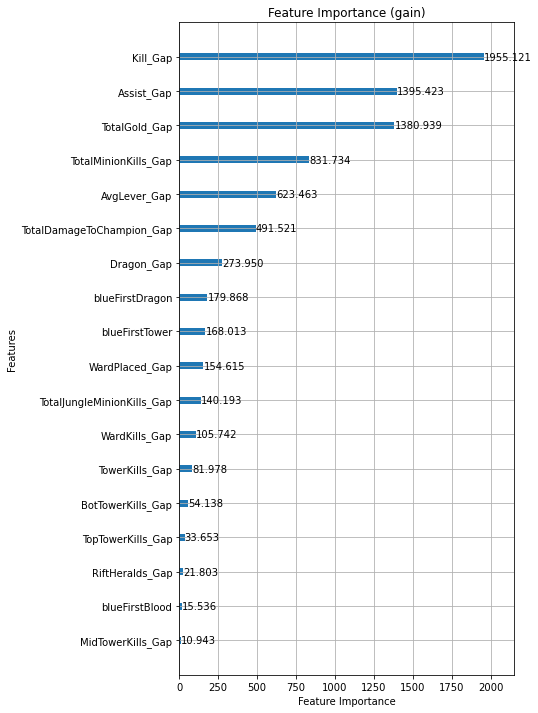

In [5]:


pred_false_gameIds = []

for df in dfs:
  # Gap 변수로 변환
  df['TotalGold_Gap'] = df['blueTotalGolds'] - df['redTotalGolds']
  df['AvgLever_Gap'] = df['blueAvgLevel'] - df['redAvgLevel']
  df['TotalMinionKills_Gap'] = df['blueTotalMinionKills'] - df['redTotalMinionKills']
  df['TotalJungleMinionKills_Gap'] = df['blueTotalJungleMinionKills'] - df['redTotalJungleMinionKills']
  df['TotalDamageToChampion_Gap'] = df['blueTotalDamageToChampion'] - df['redTotalDamageToChampion']
  df['Kill_Gap'] = df['blueKill'] - df['redKill']
  df['Assist_Gap'] = df['blueAssist'] - df['redAssist']
  df['WardPlaced_Gap'] = df['blueWardPlaced'] - df['redWardPlaced']
  df['WardKills_Gap'] = df['blueWardKills'] - df['redWardKills']
  df['TowerKills_Gap'] = df['blueTowerKills'] - df['redTopTowerKills']
  df['MidTowerKills_Gap'] = df['blueMidTowerKills'] - df['redMidTowerKills']
  df['TopTowerKills_Gap'] = df['blueTopTowerKills'] - df['redTopTowerKills']
  df['BotTowerKills_Gap'] = df['blueBotTowerKills'] - df['redBotTowerKills']
  df['Inhibitor_Gap'] = df['blueInhibitor'] - df['redInhibitor']
  df['Dragon_Gap'] = df['blueDragon'] - df['redDragon']
  df['RiftHeralds_Gap'] = df['blueRiftHeralds'] - df['redRiftHeralds']

  df1 = df.drop(columns=['Unnamed: 0', 'gameId', 'blueTotalGolds',
        'blueCurrentGolds', 'blueTotalLevel', 'blueAvgLevel',
        'blueTotalMinionKills', 'blueTotalJungleMinionKills',
        'blueTotalDamageToChampion', 'blueKill', 'blueDeath',
        'blueAssist', 'blueWardPlaced', 'blueWardKills',
        'blueFirstTowerLane', 'blueTowerKills',
        'blueMidTowerKills', 'blueTopTowerKills', 'blueBotTowerKills',
        'blueInhibitor', 'blueDragonType', 'blueDragon',
        'blueRiftHeralds', 'redWins', 'redTotalGolds', 'redCurrentGolds',
        'redTotalLevel', 'redAvgLevel', 'redTotalMinionKills',
        'redTotalJungleMinionKills', 'redTotalDamageToChampion',
        'redFirstBlood', 'redKill', 'redDeath', 'redAssist', 'redWardPlaced',
        'redWardKills', 'redFirstTower', 'redFirstInhibitor',
        'redFirstTowerLane', 'redTowerKills', 'redMidTowerKills',
        'redTopTowerKills', 'redBotTowerKills', 'redInhibitor',
        'redFirstDragon', 'redDragonType', 'redDragon', 'redRiftHeralds'])

  # 승패 변환
  wl_mapping = {True:1,False:0}
  df1['blueWins'] = df1['blueWins'].map(wl_mapping)
  
  x_train, y_train = train_test(df1)

  val_size = 0.2

  x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=val_size, random_state=42)

  model = LGBMClassifier()
  model.fit(x_train, y_train)
  valid_pred = model.predict(x_valid)
  accuracy = accuracy_score(y_valid, valid_pred)
  print("Accuracy: ", accuracy*100)

  def LGBM_cv(max_depth,learning_rate, 
              n_estimators, min_child_weight, 
              subsample, colsample_bytree, silent=True):

    # 모델 정의
    model = LGBMClassifier(max_depth=int(max_depth), 
                            learning_rate=learning_rate, 
                            n_estimators=int(n_estimators), 
                            min_child_weight=min_child_weight, 
                            subsample=subsample, 
                            colsample_bytree=colsample_bytree)
    # 모델 훈련
    model.fit(x_train, y_train)

      # 예측값 출력
    y_pred= model.predict(x_valid)

    return f1_score(y_valid, y_pred)
  
  pbounds = {'max_depth': (3, 7), 
             'learning_rate': (0.01, 0.3), 
             'n_estimators': (20,100), 
             'min_child_weight': (0, 3), 
             'subsample': (0.5, 1), 
             'colsample_bytree' :(0.2, 1)}
    
  lm_bo=BayesianOptimization(f=LGBM_cv, pbounds=pbounds, verbose=2, random_state=1 )    

  lm_bo.maximize(init_points=2, n_iter=100)
  
  param = lm_bo.max['params']
  print(param)
  param['n_estimators'] = int(param['n_estimators'])
  param['max_depth'] = int(param['max_depth'])
  print(param)

  model = LGBMClassifier(**param)
  model.fit(x_train, y_train)
  valid_pred = model.predict(x_valid)
  accuracy = accuracy_score(y_valid, valid_pred)
  print("Accuracy: ", accuracy*100)

  feature_columns = list(df1.columns.difference(["blueWins"]))
  ax = plot_importance(model, max_num_features=len(feature_columns), importance_type='gain', figsize=(6,12))
  ax.set(title=f'Feature Importance (gain)', xlabel='Feature Importance', ylabel='Features')
  
  y_valid_idx = y_valid.tolist()
  pred_false_gameId = []
  for i in range(len(y_valid_idx)):
    if y_valid_idx[i] != valid_pred[i]:
      index_num = y_valid.index[i]
      pred_false_gameId.append(df.gameId[index_num])
  pred_false_gameIds.append(pred_false_gameId)
  print('done')

In [6]:
for pred_false_gameId in pred_false_gameIds:
    print(len(pred_false_gameId))

86
62
193
147
